In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
""" 
This analyses explore user activity between March and May 2025, 
the goal is to understand how users interact with different models, license and featuers and to identify patterns in usage
"""

original_df = pd.read_csv("da_internship_task_dataset.csv")

df = original_df.copy()
df.info()
df.head()

""" 
The dataset contains 120k rows and 7 columns. No missing values.
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122746 entries, 0 to 122745
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   uuid          122746 non-null  object 
 1   day_id        122746 non-null  object 
 2   license       122746 non-null  object 
 3   model         122746 non-null  object 
 4   feature       122746 non-null  object 
 5   requests_cnt  122746 non-null  float64
 6   spent_amount  122746 non-null  float64
dtypes: float64(2), object(5)
memory usage: 6.6+ MB


' \nThe dataset contains 120k rows and 7 columns. No missing values.\n'

In [3]:
df['day_id'] = pd.to_datetime(df['day_id']) #convert to datetime object
df['month'] = df['day_id'].dt.month_name()      # 'March', 'April', 'May'
df['day_of_week'] = df['day_id'].dt.day_name()  # 'Monday', 'Tuesday', ...


In [4]:
avg_requests_by_month = (
    df.groupby('month')
      .apply(lambda x: x.groupby('uuid')['requests_cnt'].sum().mean())
      .reset_index(name='avg_requests_per_user')
)

print(avg_requests_by_month)

   month  avg_requests_per_user
0  April            1255.470696
1  March            1146.668041
2    May            1377.246781


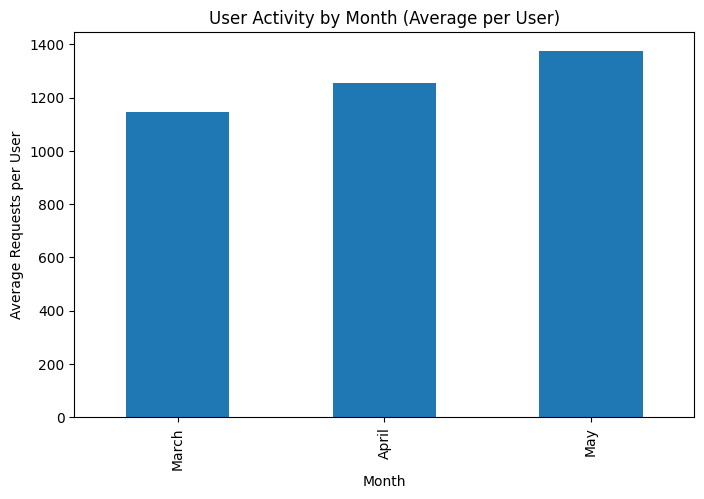

In [5]:
month_order = ['March', 'April', 'May']
avg_requests_by_month['month'] = pd.Categorical(avg_requests_by_month['month'], categories=month_order, ordered=True)
avg_requests_by_month = avg_requests_by_month.sort_values('month')

avg_requests_by_month.plot(
    x='month', y='avg_requests_per_user', kind='bar', figsize=(8,5), legend=False
)
plt.title("User Activity by Month (Average per User)")
plt.ylabel("Average Requests per User")
plt.xlabel("Month")
plt.show()

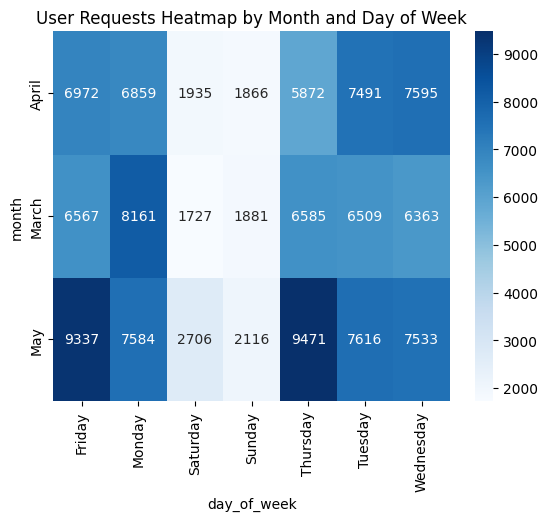

' \nThere are more user requests during working days than on weekends.\nThe peak of activity is observed in May.\n'

In [6]:
heat = df.groupby(['month', 'day_of_week'])['uuid'].count().unstack()
sns.heatmap(heat, cmap='Blues', annot=True, fmt='d')
plt.title("User Requests Heatmap by Month and Day of Week")
plt.show()

""" 
There are more user requests during working days than on weekends.
The peak of activity is observed in May.
"""

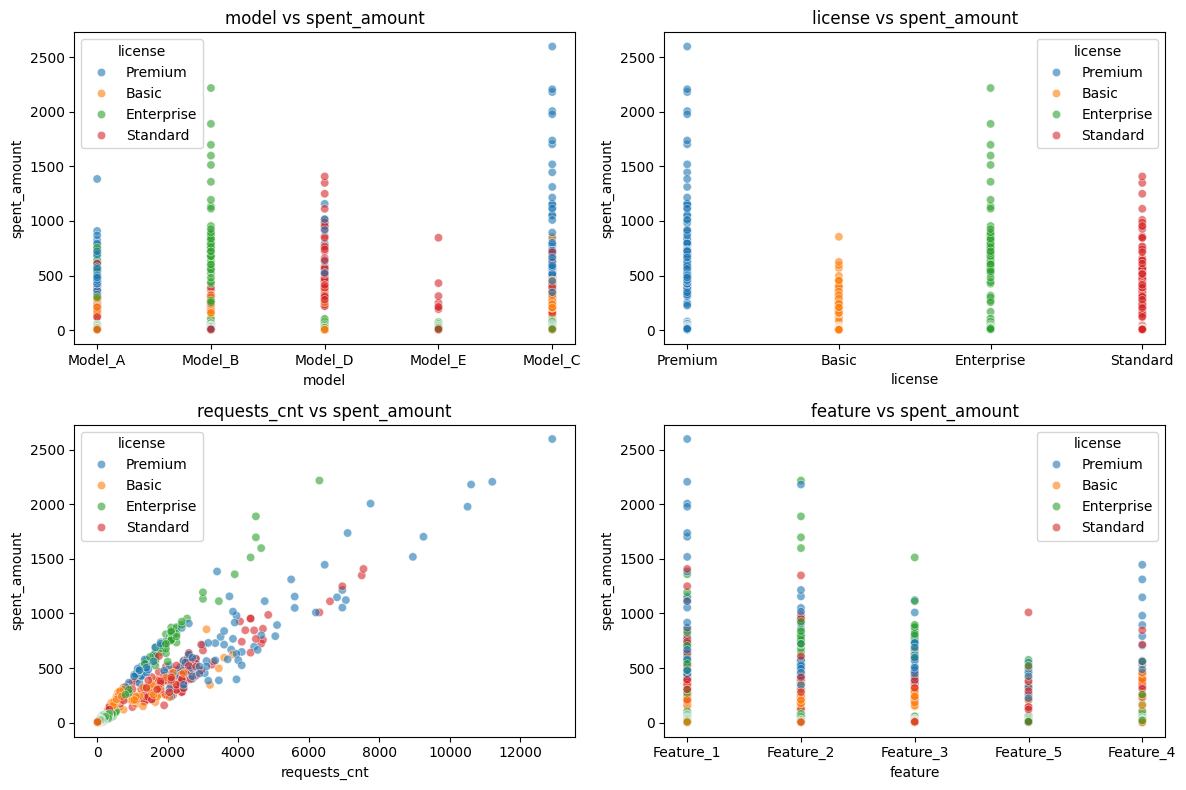

' \nrelationships between models, licenses, and features with key metrics like requests_cnt and spent_amount.\n'

In [7]:
df_key_metrics = df[["model", "license", "feature", "requests_cnt", "spent_amount"]]

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.flatten()

vars_to_plot = ["model", "license", "requests_cnt", "feature"]

for i, var in enumerate(vars_to_plot):
    sns.scatterplot(
        x=var,
        y="spent_amount",
        data=df_key_metrics,
        ax=ax[i],
        hue="license",
        alpha=0.6
    )
    ax[i].set_title(f"{var} vs spent_amount")

plt.tight_layout()
plt.show()

""" 
relationships between models, licenses, and features with key metrics like requests_cnt and spent_amount.
"""

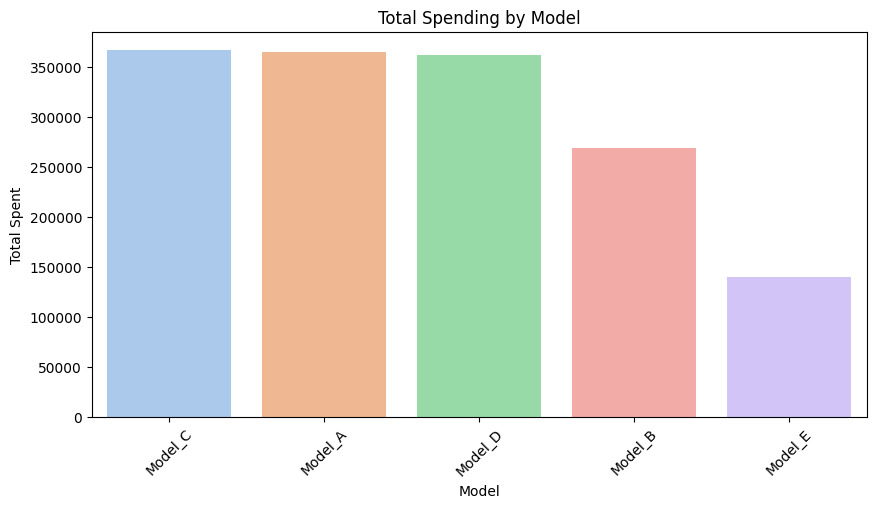

         avg_requests  avg_spent  total_requests  total_spent
model                                                        
Model_C     79.474318  15.005187       1941796.0    366621.74
Model_A     26.074681   9.596685        991933.0    365077.08
Model_D     77.555992  14.806012       1894150.0    361607.23
Model_B     31.604111  11.603898        730371.0    268166.08
Model_E     57.607238  10.946868        733801.0    139441.21


In [8]:
model_stats = (
    df.groupby('model')
      .agg(
          avg_requests=('requests_cnt', 'mean'),
          avg_spent=('spent_amount', 'mean'),
          total_requests=('requests_cnt', 'sum'),
          total_spent=('spent_amount', 'sum')
      )
      .sort_values('total_spent', ascending=False)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=model_stats.index, y=model_stats['total_spent'], palette="pastel")

plt.title("Total Spending by Model")
plt.xlabel("Model")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.show()
print(model_stats)

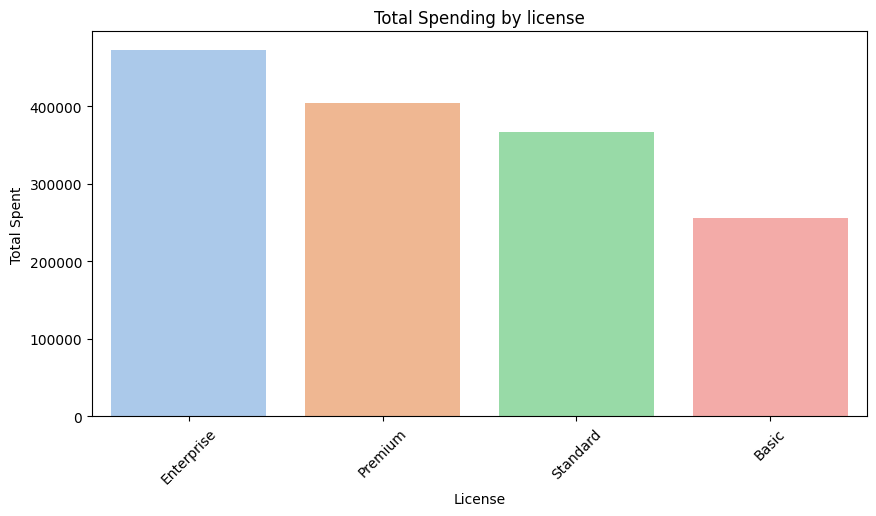

            avg_requests  avg_spent  total_requests  total_spent
license                                                         
Enterprise     81.875064  20.124076       1925374.0    473237.77
Premium        75.992222  17.851938       1719628.0    403971.50
Standard       41.985817   9.833285       1568926.0    367450.21
Basic          27.480004   6.531590       1078123.0    256253.86


In [27]:
license_stats = (
    df.groupby('license')
      .agg(
          avg_requests=('requests_cnt', 'mean'),
          avg_spent=('spent_amount', 'mean'),
          total_requests=('requests_cnt', 'sum'),
          total_spent=('spent_amount', 'sum')
      )
      .sort_values('total_spent', ascending=False)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=license_stats.index, y=license_stats['total_spent'], palette="pastel")

plt.title("Total Spending by license")
plt.xlabel("License")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.show()
print(license_stats)

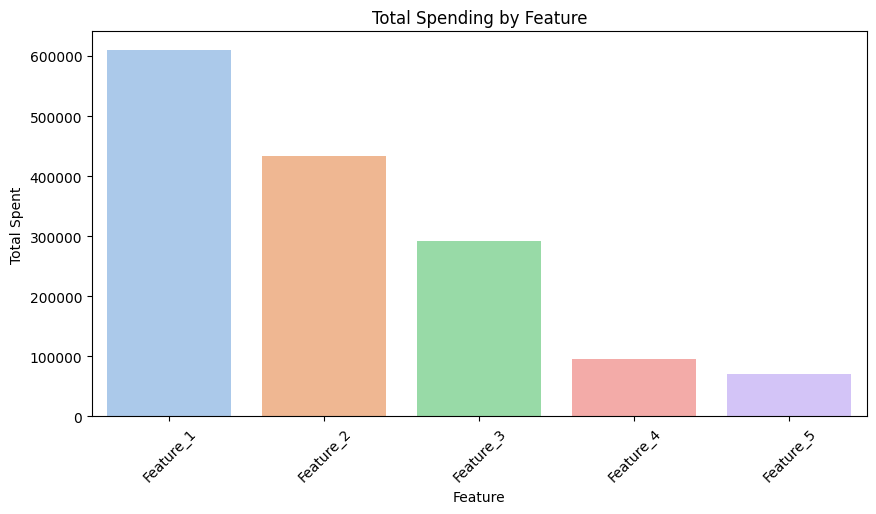

           avg_requests  avg_spent  total_requests  total_spent
feature                                                        
Feature_1     58.807000  13.447635       2669779.0    610509.16
Feature_2     48.189937  11.875319       1756475.0    432843.51
Feature_3     43.209641  11.108493       1135679.0    291964.51
Feature_4     58.657324  13.164737        424855.0     95352.19
Feature_5     41.408437   9.528482        305263.0     70243.97


In [24]:
feature_stats = (
    df.groupby('feature')
      .agg(
          avg_requests=('requests_cnt', 'mean'),
          avg_spent=('spent_amount', 'mean'),
          total_requests=('requests_cnt', 'sum'),
          total_spent=('spent_amount', 'sum')
      )
      .sort_values('total_spent', ascending=False)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_stats.index, y=feature_stats['total_spent'], palette="pastel")

plt.title("Total Spending by Feature")
plt.xlabel("Feature")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.show()
print(feature_stats)

              requests_cnt  spent_amount
requests_cnt      1.000000      0.944177
spent_amount      0.944177      1.000000


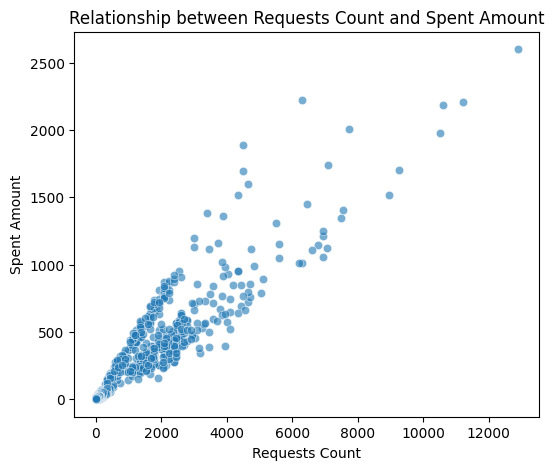

'\nstrong positive correlation (r = 0.94), as the number of requests increases, the amount of credits spent tends to increase proportionally.\n'

In [18]:
print(df[['requests_cnt', 'spent_amount']].corr())

plt.figure(figsize=(6, 5))
sns.scatterplot(
    x='requests_cnt',
    y='spent_amount',
    data=df,
    alpha=0.6
)
plt.title("Relationship between Requests Count and Spent Amount")
plt.xlabel("Requests Count")
plt.ylabel("Spent Amount")
plt.show()

"""
strong positive correlation (r = 0.94), as the number of requests increases, the amount of credits spent tends to increase proportionally.
"""

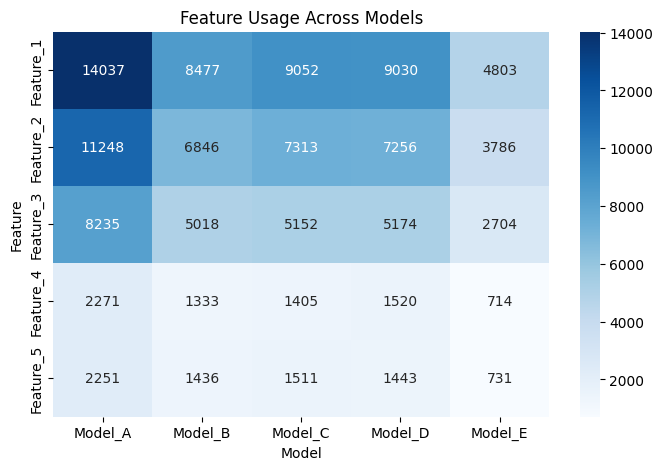

In [14]:
feature_model_usage = (
    df.groupby(['model', 'feature'])
    .size()
    .reset_index(name='usage_count')
)


plt.figure(figsize=(8, 5))
pivot = feature_model_usage.pivot(index='feature', columns='model', values='usage_count')
sns.heatmap(pivot, cmap='Blues', annot=True, fmt=".0f")
plt.title("Feature Usage Across Models")
plt.xlabel("Model")
plt.ylabel("Feature")
plt.show()


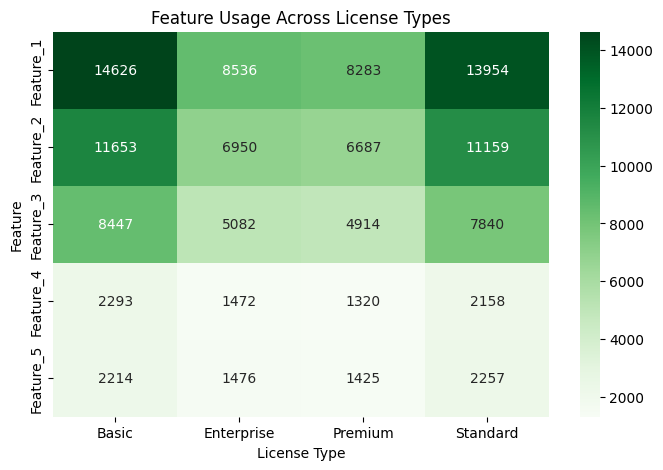

In [15]:
feature_license_usage = (
    df.groupby(['license', 'feature'])
    .size()
    .reset_index(name='usage_count')
)

pivot_license = feature_license_usage.pivot(index='feature', columns='license', values='usage_count')

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_license, cmap='Greens', annot=True, fmt=".0f")
plt.title("Feature Usage Across License Types")
plt.xlabel("License Type")
plt.ylabel("Feature")
plt.show()

In [16]:
"""
Observations:
- Feature_1 and Feature_2 are most frequently used overall.
- Model_A users use more intensively.
- Basic and Standard license users show higher usage across almost all features, especially Feature_1 and Feature_2.
"""

'\nObservations:\n- Feature_1 and Feature_2 are most frequently used overall.\n- Model_A users use more intensively.\n- Basic and Standard license users show higher usage across almost all features, especially Feature_1 and Feature_2.\n'